In [1]:
import torch
from glob import glob
from model import Generator, MultiPeriodDiscriminator, MultiScaleDiscriminator, feature_loss, generator_loss, discriminator_loss
from utils import dict_to_object, plot_specgram
from dataset import SimpleAudioDataset
from audio import spectogram

# SuperVoice welcome notebook
This notebook contains various trash code i am using during exploration, nothing to see here, but just in case someone would want to see

In [2]:
config = dict_to_object({
    "resblock": "1",
    "num_gpus": 1,
    "batch_size": 16,
    "learning_rate": 0.0002,
    "adam_b1": 0.8,
    "adam_b2": 0.99,
    "lr_decay": 0.999,
    "seed": 42,

    "upsample_rates": [8,8,2,2],
    "upsample_kernel_sizes": [16,16,4,4],
    "upsample_initial_channel": 512,
    "resblock_kernel_sizes": [3,7,11],
    "resblock_dilation_sizes": [[1,3,5], [1,3,5], [1,3,5]],

    # STFT parameters
    "segment_size": 8192,
    "num_mels": 80,
    "num_freq": 1025,
    "n_fft": 1024,
    "hop_size": 256,
    "win_size": 1024,

    "sampling_rate": 22050,

    "fmin": 0,
    "fmax": 8000,
    "fmax_for_loss": None,
})

# Device
device = torch.device('cuda:0')

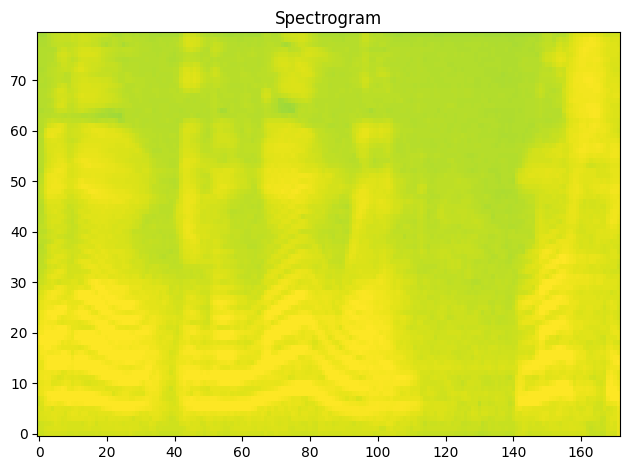

In [7]:
training = SimpleAudioDataset(glob("external_datasets/lj-speech-1.1/wavs/*.wav"), config.sampling_rate, config.sampling_rate * 2)
plot_specgram(spectogram(training[0], config.n_fft, config.num_mels, config.hop_size, config.win_size, config.sampling_rate))

In [ ]:
# Model
generator = Generator(config).to(device)
mpd = MultiPeriodDiscriminator().to(device)
msd = MultiScaleDiscriminator().to(device)